# 4章 モデルの訓練

## 4.1 線形回帰

$$
    \hat{y} = h_0 (\boldsymbol{x}) = \theta ^ T \cdot \boldsymbol{x}
$$ 


こんな感じの線形回帰モデルにできたらうれしい．JupyterのMDでTeX数式使えるの便利すぎて涙出そう．

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

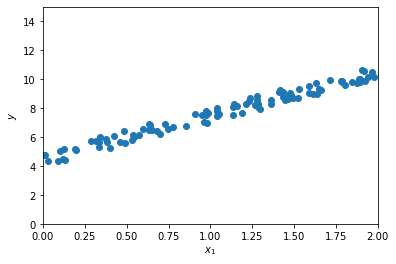

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.axis([0.0, 2.0, 0.0, 15])
plt.ylabel(r'$y$')
plt.xlabel(r'$x_1$')
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.57135679],
       [2.92839149]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # x0 = 1
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.57135679],
       [10.42813976]])

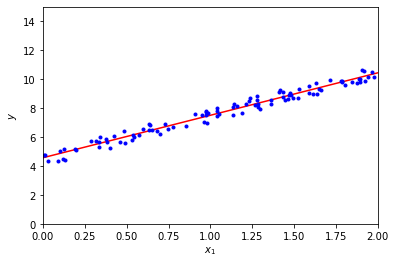

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.ylabel(r'$y$')
plt.xlabel(r'$x_1$')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.57135679]), array([[2.92839149]]))

In [11]:
lin_reg.predict(X_new)

array([[ 4.57135679],
       [10.42813976]])

### 4.1.2 計算量
$$
一般に O(n^{2.4}) から O(n^{3})
$$

$O(n^{2.4})$は[Coppersmith–Winograd algorithm](https://en.wikipedia.org/wiki/Coppersmith%E2%80%93Winograd_algorithm)で$O(n^{2.376})$出るらしい  
$O(n^{3})$は例えばガウスの消去法とか  
この辺は[Wikipedia](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#ref_blockinversion)に乗ってる．知らんけど．

## 4.2 勾配降下法